<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Distributions: Part II
              
</p>
</div>

Data Science Cohort Live NYC Aug 2024
<p>Phase 2</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

#### The normal distribution
- Why do people care so much about this distribution?

Sum of N independent, random variables each following same distribution:

$$ S = X_1 + X_2 + ... + X_N $$

- Each having same mean, variance, etc.
- **S** is a composite variable.

Let each $X_i$ be the result of a Bernoulli trial:

<img src = "Images/simple_bernoulli.png" width = 500>

- $S$ would be how many steps right under $N$ trials.
- What kind of distribution?

Binomial!
3 trials.

In [2]:
from scipy.stats import binom
import matplotlib.pyplot as plt
N = 3
p = 0.5

pmf_binomial = [(x, binom.pmf(x, n = N, p = p)) 
                for x in range(0,10)]

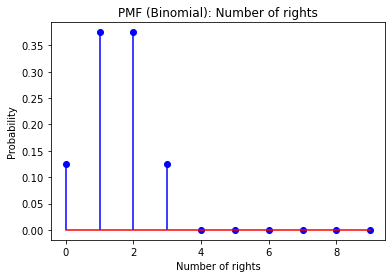

In [3]:
x,y = list(zip(*pmf_binomial))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Number of rights')
plt.ylabel('Probability')
plt.title('PMF (Binomial): Number of rights')
plt.show()

Plot it for actual distance deviation:

$$ d = n_R - n_L = n_R - (N-n_r)$$

In [4]:
import numpy as np
N = 3
p = 0.5

pmf_deviation = [(x - (N - x), binom.pmf(x, n = N, p = p)) 
                for x in np.arange(-5,5,1)]

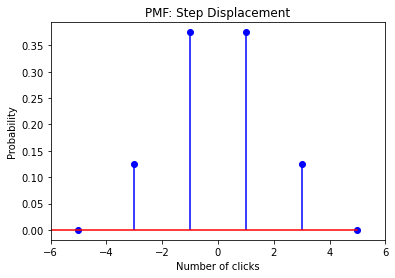

In [5]:
x,y = list(zip(*pmf_deviation))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Number of clicks')
plt.ylabel('Probability')
plt.title('PMF: Step Displacement')
plt.xlim(-6,6)
plt.show()

When $N$ gets sufficiently big:

In [7]:
from IPython.display import YouTubeVideo

galton_video = YouTubeVideo('TwctT3Ncm1w', width = 800, height = 600)

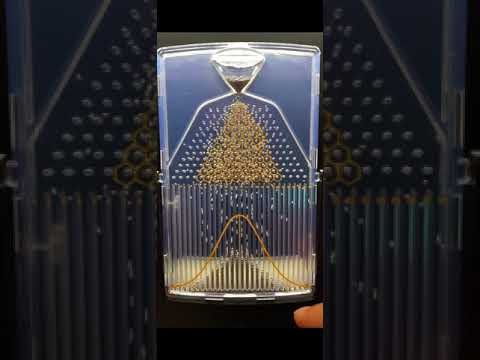

In [8]:
display(galton_video)

- If make slits finer, and $N \rightarrow \infty$ :
- Becomes the continuous normal pdf.

$$ S = X_1 + X_2 + ... + X_N $$ 

follows normal distribution provided that each $X_i$:
- follows a population distribution:
    - Finite variance.
    - Defined mean.



**Most distributions satisfying weak requirements**:

Bernoulli was an underlying distribution that satisfied this.

Sum of random variables drawn from these distribution follows normal distribution as N goes large.

This is underneath why binomial approaches normal as $ N $ gets large:

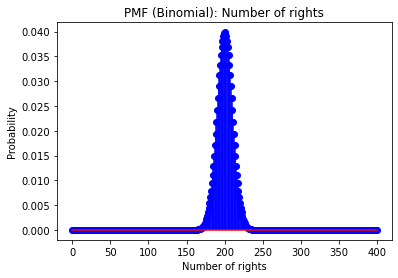

In [11]:
import numpy as np
N = 400
p = 0.5

pmf_largeN = [(x, binom.pmf(x, n = N, p = p)) 
                for x in np.arange(0, N)]

x,y = list(zip(*pmf_largeN))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Number of rights')
plt.ylabel('Probability')
plt.title('PMF (Binomial): Number of rights')
plt.show()


#### Known as: The central limit theorem

Take N = 50 samples of waiting times of drivers at a toll:

- Follows exponential distribution with average wait time $\tau$
- Has finite variance $\tau^2$.

In [13]:
from scipy.stats import expon

#assume population mean 3 minutes
pop_mean = 3

wait_time_sample = expon.rvs(scale = pop_mean, size = 50)

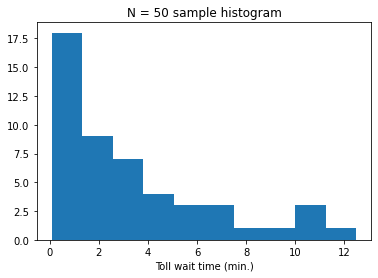

In [14]:
plt.hist(wait_time_sample)
plt.xlabel('Count')
plt.xlabel('Toll wait time (min.)')
plt.title('N = 50 sample histogram')
plt.show()


Obviously, not normal distributed.

- Want statistics/uncertainty of the **sample mean** as we repeat for many trials of samples with N = 50.

$$ \bar{T} = \frac{1}{N}\sum_{i=1}^{N}T_i $$

- Here N = 50
- Apart from factor of (1/N), this is a sum of random variables!

##### Create a list of 10,000 trials of these N = 50 samples from exponential distribution:
- get $N = 50$ sample
- get mean of times in small sample (this is a statistic $\bar{T}$)
- Do this 10,000 times

In [16]:
pop_mean = 3
many_sample_trials = [expon.rvs(loc = pop_mean/2, scale = pop_mean/2, size = 50) for trial in range(10000)]
many_sample_trials[0:2]

[array([2.8935832 , 3.59919878, 2.50439566, 1.7942995 , 4.19753199,
        2.22862398, 2.01839331, 2.05098429, 6.91089149, 4.62013422,
        6.2936134 , 3.23047237, 4.92460946, 2.74735122, 3.95337275,
        1.93378046, 3.27225609, 1.92539867, 2.12888342, 1.96281222,
        3.637811  , 2.24175048, 1.82135688, 2.54097807, 3.64606619,
        3.01565171, 1.67778052, 2.52258261, 2.76477659, 1.71825121,
        2.91066089, 2.0353302 , 2.16635507, 2.83969672, 2.92371803,
        3.03226019, 2.06357185, 2.55963279, 2.010115  , 3.85682761,
        2.18349399, 2.75930879, 2.32385618, 2.01954859, 2.23344719,
        4.18868667, 4.19728062, 4.32526948, 3.65263317, 1.51745969]),
 array([8.01309681, 1.69703552, 4.55095092, 1.78050007, 3.42335713,
        2.07693135, 2.0016882 , 2.00578709, 2.06907198, 1.88225204,
        2.66292502, 3.7876783 , 3.04023804, 2.40637906, 2.56121601,
        3.5702534 , 5.98476853, 1.6343267 , 3.46459961, 3.92074434,
        4.93535497, 6.61820619, 2.53705692, 4.

Return list of 10,000 sample means:

In [17]:
sample_mean_list = [sample.mean() for sample in many_sample_trials]
len(sample_mean_list)
sample_mean_list

[2.9315348894586073,
 3.2234195126551914,
 3.076591160538429,
 3.2453274992790573,
 2.970651483895586,
 2.750551806868671,
 2.7295782220953004,
 2.9513214978569318,
 2.9709313603326963,
 2.6730198800693272,
 2.762537258369676,
 2.6257196298411087,
 3.135899732170543,
 3.576232702669486,
 3.1923751306044035,
 2.996797152728801,
 2.942816668298846,
 2.872310964303757,
 2.875374412019468,
 2.945442582956572,
 2.991413146197706,
 3.0046540465178153,
 2.905980653307186,
 2.942284117309418,
 3.294797928051265,
 3.48539169808747,
 2.9829982946744,
 3.1719940223715013,
 2.960746808981623,
 3.024251794316574,
 3.034958960766415,
 2.901159973625291,
 3.277106321387521,
 2.882799939467255,
 2.966144991123128,
 2.9653173341696517,
 2.9899870641018382,
 3.1841924946166977,
 3.0734168126306436,
 3.1756908460819715,
 3.045791093426929,
 3.0051582470506037,
 3.1129444263000696,
 2.883082708035511,
 3.4548056658922746,
 3.0403265808119615,
 3.1199921588866393,
 3.449420340850632,
 3.0259451775618613,
 

What does the distribution of means look like?

$$ \bar{T} = \frac{1}{N}\sum_{i=1}^{N}T_i $$

Note: mean is sum of random variables drawn from exponential distribution up to a factor

Construct histogram of $\bar{T}$:

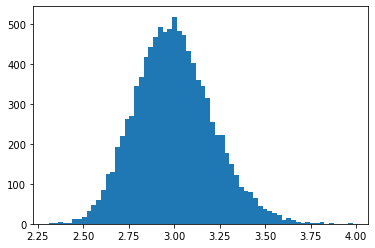

In [18]:
plt.hist(sample_mean_list, bins = "auto")
plt.show()

**The distribution of mean of a sample follow normal distribution**

- Regardless of underlying population distribution.

This is a very large reason why normal distribution is so important!

#### Standard Normal Distribution

- Often useful to rescale normal by mean/std.
- New rescaled normal has mean of 0 and variance of 1.
- Z-distribution.

We simply subtract the mean $\mu$ from each value and then divide by the standard deviation $\sigma$:

$$z = \frac{x - \mu}{\sigma}$$

We call this process **standardization**.

Mathematical form for pdf:
$$ N(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

- $\mu$ is mean.
- $\sigma$ is standard deviation.

Scaled transformation:
$$ \frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}} $$

<center><img src = "Images/rescale_normal.png" width = 500></center>

#### $z$-Score: why this transformation is useful

A **$z$-score** for a data point $x$ (in a normal distribution) is simply the distance to the mean in units of standard deviations

$$\large z = \frac{x - \mu}{\sigma}$$

Transforming observations on original scale to z-score:
- we can see how unlikely a value is. 
- i.e. how many stds away from center of normal

<center><img src = "Images/rescale_normal.png" width = 500></center>

#### The Empirical Rule

- $68\%$ of the values of a normal distribution: lie within 1 standard deviation ($\sigma$) of the mean.
- $95\%$ within $2\sigma$.
- $99.7\%$ within $3\sigma$.  

#### Using .cdf to get empirical rule:

Instead of looking at empirical rule, get probability given z-score:

I have $X$ distributed normally with mean 5 and standard deviation 2:
- How many standard deviations from center of distribution is $X = 9$?
- What percentage of the values lie within a range $X = 1$ and $X=9$?


In [39]:
# z-score
z = (9 - 5)/2
z

2.0

In [40]:
# calculate z-score:
z_score = (1 - 5)/2
z_score

-2.0

Now want $$ P(- Z^* <= z <= Z^* ) $$

which will compute empirical rule

Using the cdf:

In [42]:
from scipy.stats import norm
# using cdf: probability in an interval
empirical_rule = norm.cdf(z) - norm.cdf(- z) 
# with z-score we can use standardized normal form

empirical_rule

0.9544997361036416

I have $X$ distributed normally with mean 5 and standard deviation 2:
- What percentage of the values lie within a range $X = -1.2$ to $11.2$?

In [43]:
# calculate z-scores, use cdf

z_score = (11.2 - 5)/2


In [44]:
z_1 = (11.2 - 5)/2
z_2 = (-1.2 - 5)/2

norm.cdf(z_1) - norm.cdf(z_2)

0.9980647935735634

I have $X$ distributed normally with mean 5. Standard deviations take on 1, 3 and 5:
- What percentage of the values lie within a range $X = \pm 11.2$ for each standard deviation?

In [46]:
# calculate list of z-scores, use cdf to calculate list of percentages.
for i in range(1,6,2):
    z_score  = (11.2 - 5)/i
    print('Percentage of values of std deviation '+str(i)+' is')
    # print(f"Percentage of values of std deviation {z_score}") (f string)
    print(norm.cdf(z_score)-norm.cdf(-z_score))

Percentage of values of std deviation 1 is
0.9999999994353683
Percentage of values of std deviation 3 is
0.9612344258223628
Percentage of values of std deviation 5 is
0.7850246058508261


In [47]:
list(range(1,6,2))

[1, 3, 5]